In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#stories 1 contains data we got from adj+nouns iteration. Change to just stories dataset for everything else 
df_stories = pd.read_csv('stories1.csv', '\n')
df_stories.head()

processedData = list(df_stories["col"]) 

In [3]:
df_vectors = pd.read_csv('GloVe_cbow_augmented_data_with_backtrans.csv', ',') # change this file name §§§§
df_vectors.drop(df_vectors.columns[0], axis=1,inplace=True)
df_vectors_with_PCA = df_vectors.copy()

df_vectors.head()
df_vectors_with_PCA.head()
# print(df_vectors.shape)GloVe_skipgram

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-4.961814,13.023991,6.001929,-4.960390,-0.438913,3.559329,6.930883,2.079365,-0.030307,1.080264,-3.654123,-7.637014,6.833296,5.306879,1.769105,1.219804,5.136050,2.916215,-7.321949,7.822730,3.487691,6.917337,3.160865,-6.612948,3.693964,8.040141,-5.303900,-11.584953,-4.922713,-10.702860,-0.974132,7.958422,2.422007,-8.700623,2.996815,10.515053,1.172036,4.197313,6.601084,-13.898158,...,-1.029812,28.536939,-5.797499,2.045241,13.126412,-7.259683,14.290082,-2.114530,3.345250,-12.653257,-1.080069,-1.314725,1.808908,0.145302,1.951447,7.826675,-3.693736,-9.309820,-12.187858,0.226742,5.086506,0.209016,-16.656234,12.341190,-29.763200,-8.088572,3.229708,-5.218693,-0.619555,-5.165842,0.640006,4.936248,-3.975716,-2.554648,-21.195565,-4.583403,-13.500674,-7.995059,17.008929,10.276027
1,2.790306,22.612303,23.208282,-12.324898,-16.730333,19.097292,8.528727,14.073839,-3.233583,7.355856,-4.934312,0.253750,14.191507,7.974718,14.472236,1.348496,10.423697,4.064797,-2.150787,13.994235,8.608564,6.395695,11.106984,-3.907240,19.426376,8.824882,-12.140964,-19.241236,-1.916058,-14.602759,-6.362843,21.296525,14.028903,-2.392690,3.677173,15.434031,-1.363559,7.460543,5.965074,-15.154596,...,-5.442845,55.523508,-16.366428,6.271826,41.562690,-10.034974,29.381684,-15.900939,4.543877,-22.319029,-5.185369,-4.623555,8.954679,-5.499682,4.369719,22.735753,-10.513695,-16.796639,-31.360631,17.398138,25.552781,-6.619548,-28.071165,16.005119,-69.190288,-22.947141,4.747963,-9.633169,-7.547307,-2.716751,-6.678244,-7.020330,-3.714717,1.348750,-35.997205,-13.969983,-28.049745,-15.075478,32.027248,-0.923793
2,-4.219720,9.297739,11.590141,-8.889560,-4.049766,9.557839,-1.821534,2.576350,2.592554,-2.979247,-4.087874,-2.360766,9.851732,1.478831,5.271709,-3.403768,-2.391450,5.641538,-6.318555,7.500165,6.599175,3.685513,-0.642444,-11.761972,6.663873,6.777750,-9.868100,-10.388921,0.804006,-7.427212,-1.275542,14.117201,-1.478194,-1.829306,2.914700,11.651814,-3.996225,-2.100856,4.549900,-11.999882,...,-2.226266,31.949747,-12.046433,2.221703,16.305689,-0.601261,18.602104,-1.518858,6.160337,-10.712076,1.909975,-9.514327,2.929118,-5.693646,2.410284,13.192103,-4.285082,-7.268475,-17.295138,0.300946,13.864994,-3.064937,-16.176735,7.919728,-42.872275,-7.778265,5.658957,3.009295,-10.680902,-12.586943,-1.116004,-0.474896,-5.730437,-2.403659,-16.859824,-5.227967,-9.020539,-6.654704,12.948126,11.290941
3,-0.608154,6.755185,3.451885,-1.394372,-1.688699,6.046118,-3.668173,1.388566,0.593837,-1.414823,-1.636507,2.829838,6.306436,4.276650,2.168046,-7.751403,1.638569,5.972059,-7.597195,5.925834,4.125134,-1.209635,-0.862927,-3.987523,3.970628,3.993981,-8.024444,-10.534540,6.240447,-3.510389,-3.312386,8.799655,0.480972,-1.752993,-1.408154,4.724340,-0.832584,1.495385,3.342127,-0.806392,...,1.033991,15.204359,-10.432248,-1.986495,11.156763,1.530313,8.549897,1.237564,-1.230582,-4.792231,-0.943958,-5.490170,-2.797393,-4.805472,3.854799,5.507326,-5.714068,-4.979624,-7.841026,-0.205914,5.291176,0.707454,-9.812025,0.407991,-21.785876,-4.418815,3.907016,-2.015268,-1.846272,-3.877308,1.451592,-2.558357,-0.368531,-4.059266,-12.595785,-5.320823,-2.346988,-2.152365,5.873356,4.732817
4,-0.490175,7.455332,9.666709,-7.373030,-0.852450,9.697240,1.328006,3.505478,-2.889196,-3.422483,0.230709,-1.105695,0.242474,2.645065,2.887201,1.661041,0.925013,7.004121,-7.361721,0.373935,5.578257,4.671264,3.780296,0.910196,4.525446,5.711484,-8.844962,-7.354283,6.148212,-4.330111,4.436525,9.105334,5.260007,2.579420,0.915379,5.137669,-4.322160,4.012111,2.840176,-5.269599,...,-0.520430,17.529421,-6.240614,3.594362,10.963941,-0.433879,13.430615,-3.377255,1.770875,-9.713211,-5.214400,-2.158877,2.200843,-3.727466,0.191351,4.302014,-3.195690,-9.066244,-14.310017,2.390245,14.561625,0.959039,-13.772528,2.85818

In [4]:
#for visualization
import pandas as pd
wiki_lst=[]
title=[]
for story_index, data in enumerate(processedData):
    wiki_lst.append(data)
    title.append(story_index)
print("examine content")
wiki_lst

examine content


['smell rotten eggs memorable smell mouth small full assumed embarrassed fess real needless sure',
 'foul litter smell hit entire smell urine lesser extent whole smell gigantic red litter pan right unfortunately adorable litter pan clean smell dizzy urine strong noxious mix tried cute didnt mention fault drag breathe mouth inhale vow litter pan',
 'smell coworker fart didnt quiet nauseated cool bottle freshener sprayed whole smell worse long puke',
 'dragon yelled close smell bad much worse focused',
 'bush pile smell pungent smeared embarrassed smelled terrible hot sun smell worse humiliating',
 'dhomeless ordinary typical live urban fair ragged homeless wander stop sudden dirty homeless individual aisle smell alcohol unmistakable musk aisle several physical presence right next smell bad open fresh decided next little late',
 'stinky next deodorant stunk bad',
 'much much cologne strong long noticed',
 'seminar different smell asia several puke behave',
 'accidental washed tide sport 

##Without PCA

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df_vectors)
data_scaled = pd.DataFrame(data_scaled, columns= df_vectors.columns)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.046957,0.123255,0.056800,-0.046944,-0.004154,0.033684,0.065592,0.019678,-0.000287,0.010223,-0.034582,-0.072274,0.064668,0.050223,0.016742,0.011544,0.048606,0.027598,-0.069293,0.074032,0.033006,0.065464,0.029913,-0.062583,0.034959,0.076089,-0.050195,-0.109637,-0.046587,-0.101289,-0.009219,0.075316,0.022921,-0.082340,0.028361,0.099511,0.011092,0.039722,0.062471,-0.131528,...,-0.009746,0.270065,-0.054866,0.019356,0.124224,-0.068703,0.135237,-0.020011,0.031658,-0.119747,-0.010221,-0.012442,0.017119,0.001375,0.018468,0.074069,-0.034956,-0.088105,-0.115342,0.002146,0.048137,0.001978,-0.157630,0.116793,-0.281670,-0.076548,0.030565,-0.049388,-0.005863,-0.048888,0.006057,0.046715,-0.037625,-0.024176,-0.200588,-0.043376,-0.127766,-0.075663,0.160967,0.097249
1,0.012090,0.097974,0.100557,-0.053401,-0.072489,0.082745,0.036953,0.060979,-0.014010,0.031871,-0.021379,0.001099,0.061489,0.034553,0.062705,0.005843,0.045164,0.017612,-0.009319,0.060634,0.037299,0.027711,0.048124,-0.016929,0.084171,0.038236,-0.052604,-0.083368,-0.008302,-0.063271,-0.027569,0.092273,0.060784,-0.010367,0.015932,0.066872,-0.005908,0.032325,0.025845,-0.065662,...,-0.023583,0.240572,-0.070912,0.027175,0.180083,-0.043479,0.127305,-0.068896,0.019688,-0.096704,-0.022467,-0.020033,0.038799,-0.023829,0.018933,0.098509,-0.045554,-0.072776,-0.135879,0.075383,0.110715,-0.028681,-0.121627,0.069347,-0.299787,-0.099425,0.020572,-0.041739,-0.032701,-0.011771,-0.028935,-0.030418,-0.016095,0.005844,-0.155969,-0.060529,-0.121534,-0.065319,0.138768,-0.004003
2,-0.031230,0.068812,0.085778,-0.065791,-0.029972,0.070737,-0.013481,0.019067,0.019187,-0.022049,-0.030254,-0.017472,0.072912,0.010945,0.039016,-0.025191,-0.017699,0.041753,-0.046763,0.055508,0.048840,0.027276,-0.004755,-0.087050,0.049319,0.050162,-0.073033,-0.076888,0.005950,-0.054968,-0.009440,0.104481,-0.010940,-0.013539,0.021572,0.086235,-0.029576,-0.015548,0.033674,-0.088811,...,-0.016476,0.236459,-0.089155,0.016443,0.120678,-0.004450,0.137673,-0.011241,0.045592,-0.079280,0.014136,-0.070415,0.021678,-0.042138,0.017838,0.097634,-0.031714,-0.053794,-0.128001,0.002227,0.102614,-0.022683,-0.119723,0.058614,-0.317296,-0.057567,0.041882,0.022272,-0.079049,-0.093155,-0.008259,-0.003515,-0.042411,-0.017789,-0.124779,-0.038692,-0.066761,-0.049251,0.095828,0.083564
3,-0.008010,0.088972,0.045464,-0.018365,-0.022242,0.079633,-0.048313,0.018289,0.007821,-0.018634,-0.021554,0.037271,0.083061,0.056327,0.028555,-0.102093,0.021581,0.078657,-0.100062,0.078048,0.054332,-0.015932,-0.011366,-0.052519,0.052297,0.052604,-0.105689,-0.138749,0.082192,-0.046235,-0.043627,0.115899,0.006335,-0.023088,-0.018547,0.062224,-0.010966,0.019696,0.044019,-0.010621,...,0.013619,0.200255,-0.137402,-0.026164,0.146944,0.020156,0.112610,0.016300,-0.016208,-0.063118,-0.012433,-0.072310,-0.036844,-0.063292,0.050771,0.072536,-0.075259,-0.065586,-0.103273,-0.002712,0.069689,0.009318,-0.129233,0.005374,-0.286939,-0.058200,0.051459,-0.026543,-0.024317,-0.051068,0.019119,-0.033696,-0.004854,-0.053464,-0.165898,-0.070080,-0.030912,-0.028349,0.077357,0.062335
4,-0.005308,0.080735,0.104682,-0.079844,-0.009231,0.105013,0.014381,0.037961,-0.031288,-0.037063,0.002498,-0.011974,0.002626,0.028644,0.031266,0.017988,0.010017,0.075849,-0.079721,0.004049,0.060408,0.050586,0.040937,0.009857,0.049007,0.061850,-0.095783,-0.079641,0.066580,-0.046891,0.048044,0.098603,0.056961,0.027933,0.009913,0.055637,-0.046805,0.043448,0.030757,-0.057065,...,-0.005636,0.189829,-0.067580,0.038924,0.118730,-0.004699,0.145442,-0.036573,0.019177,-0.105186,-0.056467,-0.023379,0.023833,-0.040365,0.002072,0.046587,-0.034607,-0.098180,-0.154965,0.025884,0.157690,0.010386,-0.149145,0.030952,-0.288678,-0.098976,0.042840,-0.019334,-0.061976,-0.033028,0.007086,-0.067484,-0.059558,0

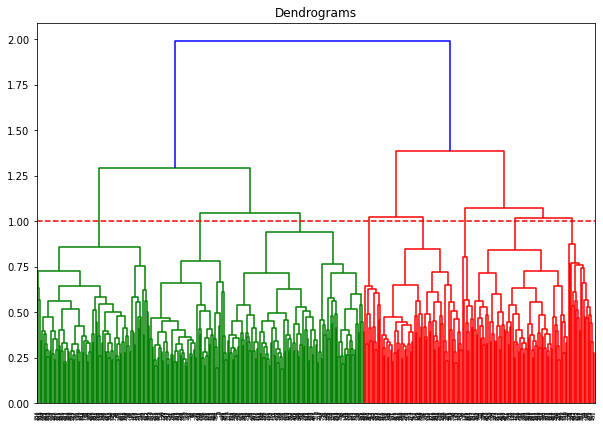

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

In [ ]:
#Tried to get sub cluster heirarchies
# from sklearn.cluster import AgglomerativeClustering
# import csv


# def initialize_cluster_dict(): 
#   story_cluster_dict = {}
#   for story in processedData: 
#     story_cluster_dict[story] = []
#   return story_cluster_dict

# def add_to_clusters(labels, dictionary): 
#    for story_index, label in enumerate(labels): 
#      curr_story = df_stories.iloc[story_index][0]
#      dictionary[curr_story].append(label)


# def get_sub_clustering_info(clusters, story_cluster_dict): 
#   for i in clusters: 
#     cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
#     labels = cluster.fit_predict(data_scaled)
#     add_to_clusters(labels,story_cluster_dict)

# def write_dictionary_to_file(story_cluster_dict): 
#   with open('CBOW_HCA_subclusters.csv', mode='w') as clusters:
#     cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     for story in story_cluster_dict:
#       labels = story_cluster_dict[story]
#       cluster_writer.writerow([story, labels])

# story_cluster_dict = initialize_cluster_dict()
# clusters = [2, 4,8]
# get_sub_clustering_info(clusters, story_cluster_dict )
# write_dictionary_to_file(story_cluster_dict)

  

In [ ]:
#TRYING Two CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
labels
print(len(labels))

439


Cluster: 0
Titles


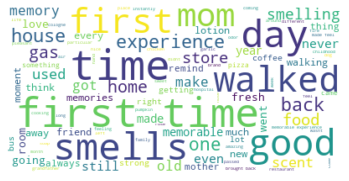

Cluster: 1
Titles


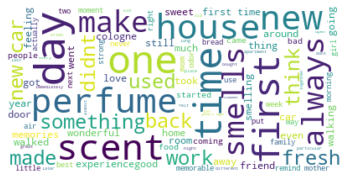

Cluster: 2
Titles


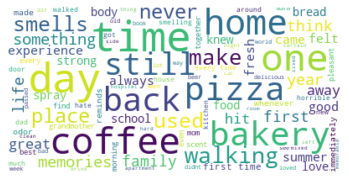

Cluster: 3
Titles


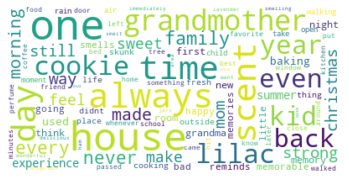

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,4):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word != "smell" and word != "smelled" and word != "really" and word != "remember"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
labels
import csv
with open('CBOW_backtrans_with_adj_noun_HCA_clusters_2_withoutPCA.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

##With PCA

43


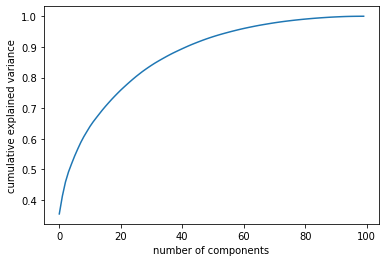

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# standardise the data
scaler = StandardScaler()
df_vectors_std = scaler.fit_transform(df_vectors_with_PCA)

# get optimal number of components 
pca = PCA()
pca.fit(df_vectors_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance'); # 45

noComponents = 0 # 0.9 is our baseline
for element in np.cumsum(pca.explained_variance_ratio_):
  noComponents = noComponents + 1
  if element >= 0.9:
    break
print(noComponents)


In [6]:
pca = PCA(n_components=noComponents)

pca.fit(df_vectors_std)

pca.transform(df_vectors_std)

scores_pca = pca.transform(df_vectors_std)

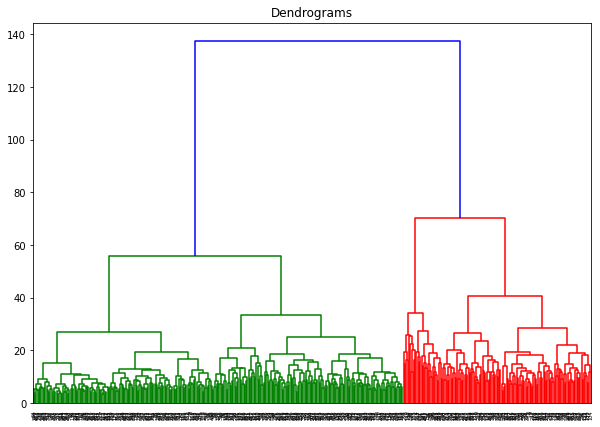

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scores_pca, method='ward'))

In [20]:
#TRYING TWO CLUSTERS
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(scores_pca)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
labels
print(len(labels))

439


Cluster: 0
Titles


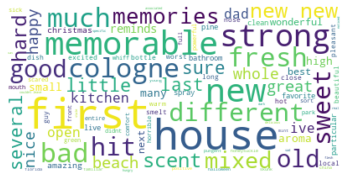

Cluster: 1
Titles


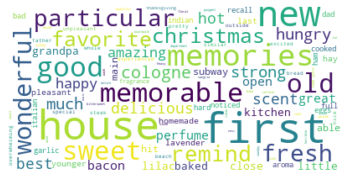

Cluster: 2
Titles


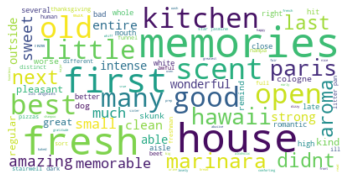

Cluster: 3
Titles


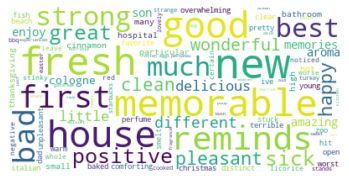

In [21]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,4):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split() if word != "smell" and word != "smelled" and word != "really"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    name = "CBOW_Iteration_3_PCA" + str(k) + ".png"
    plt.savefig(name)
    plt.show()

In [ ]:
labels
import csv
with open('clusters_adj_noun_3_with_PCA_CBOW_HCA_with_backtrans.csv', mode='w') as clusters:
  cluster_writer = csv.writer(clusters, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for story_index, label in enumerate(labels): 
    cluster_writer.writerow([df_stories.iloc[story_index][0], label])

# Evaluation


In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
labels_withoutPCA = cluster.fit_predict(data_scaled)
labels_withPCA = cluster.fit_predict(scores_pca)

##Silhouette Coefficient

### Without PCA

In [ ]:
silhouette_vals = silhouette_samples(data_scaled, labels_withoutPCA)


### With PCA

In [ ]:
silhouette_vals = silhouette_samples(scores_pca, labels_withPCA)
silhouette_vals

##Calinski-Harabasz Index

### Without PCA

In [ ]:
calinski_harabasz_val = calinski_harabasz_score(data_scaled, labels_withoutPCA)

### With PCA

In [ ]:
calinski_harabasz_val = calinski_harabasz_score(scores_pca, labels_withPCA)
calinski_harabasz_val

##Davies-Bouldin Index

### Without PCA

In [ ]:
davies_bouldin_val = davies_bouldin_score(data_scaled, labels_withoutPCA)

### With PCA

In [ ]:
davies_bouldin_val = davies_bouldin_score(scores_pca, labels_withPCA)
davies_bouldin_val